### 1. Выбор исследуемого датасета.
Для удобства выполнения работы был выбран новый датасет "Age, Weight, Height, BMI Analysis" по ссылке https://www.kaggle.com/datasets/rukenmissonnier/age-weight-height-bmi-analysis

В датасете содержатся следующие атрибуты:
* возраст(в годах)
* рост(в метрах)
* вес(в килограммах)
* Индекс массы тела (он же: ИМТ, Body Mass Index – BMI) — это величина, демонстрирующая соответствие веса человека его росту

В новом датасете достаточно атрибутов для составления зависимостей между двумя переменными, поэтому нового атрибута выделено не было.

### Вывод датасета

In [2]:
import pandas as pd
import numpy as np
# Загрузка данных
data=pd.read_csv(r"C:\Users\pumpk\Desktop\university\3.1\mlearn\bmi.csv")
researchColumns = ['Age', 'Height', 'Weight', 'Bmi']
for element in data:
    if element not in researchColumns:
        data=data.drop(element, axis='columns')

display(data)

,Age,Height,Weight,Bmi
0,61,1.85,109.3,31.935720
1,61,1.85,109.3,31.935720
2,60,1.55,74.7,31.092612
3,60,1.46,35.9,16.841809
4,60,1.58,97.1,38.896010
...,...,...,...,...
736,34,1.86,95.7,27.662157
737,44,1.91,106.9,29.302925
738,25,1.82,88.4,26.687598
739,35,1.88,98.5,27.868945


### Проверка на пропущенные значения:

In [3]:
data.isna().sum()

Age       0
Height    0
Weight    0
Bmi       0
dtype: int64

Пропущенных значений в выборке нет

### Визуализация выбросов и удаление строк, в которых они были обнаружены

Выбросы в Age
Выбросы в Height
Выбросы в Weight
Выбросы в Bmi


,Age,Height,Weight,Bmi
0,61,1.85,109.30,31.935720
1,61,1.85,109.30,31.935720
2,60,1.55,74.70,31.092612
3,59,1.71,79.32,27.126295
4,59,1.70,73.32,25.370242
...,...,...,...,...
574,23,1.78,83.30,26.290872
575,33,1.84,93.10,27.498819
576,24,1.80,85.80,26.481481
577,34,1.86,95.70,27.662157


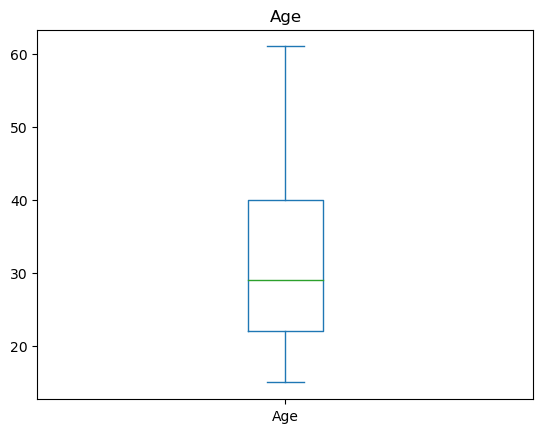

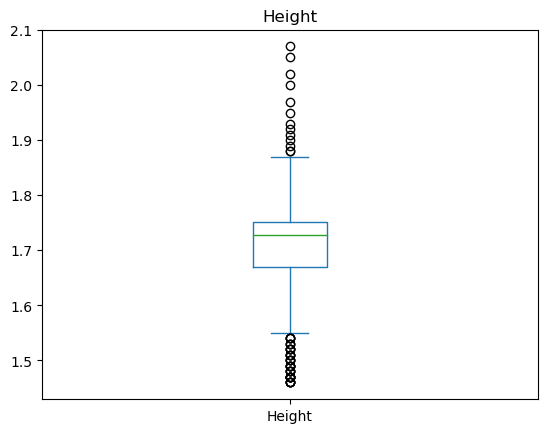

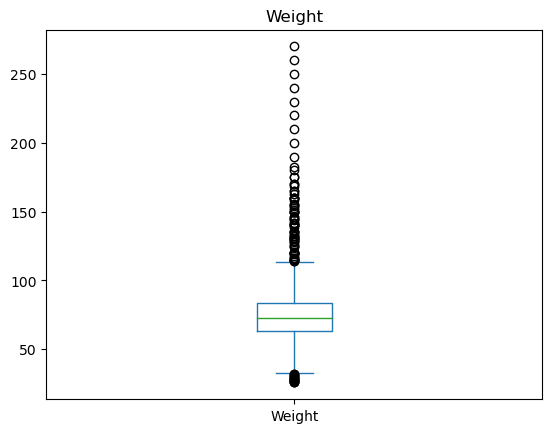

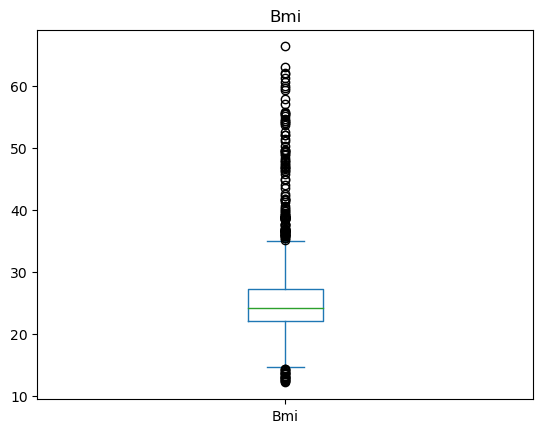

In [4]:
import matplotlib.pyplot as plt
indexes_to_drop = []
for col in researchColumns:
    plt.figure()
    plt.title(col)
    
    _, bp = data[col].plot.box(return_type='both')
    outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
    print("Выбросы в", col)
    
    for index, elem in enumerate(data[col]):
        if elem in outliers:
#             здесь выводится каждый выброс, было убрано в целях удобства чтения файла
#             print("Значение:", elem, "| Индекс строки:", index)
            indexes_to_drop.append(index)
       
data.drop(indexes_to_drop, inplace=True)
data.reset_index(drop=True, inplace=True)
display(data)

### Удаление дубликатов:

In [5]:
data.drop_duplicates(inplace=True)  # Удаление дубликатов
data.reset_index(drop=True, inplace=True)
display(data)

,Age,Height,Weight,Bmi
0,61,1.85,109.30,31.935720
1,60,1.55,74.70,31.092612
2,59,1.71,79.32,27.126295
3,59,1.70,73.32,25.370242
4,59,1.72,85.32,28.839913
...,...,...,...,...
573,23,1.78,83.30,26.290872
574,33,1.84,93.10,27.498819
575,24,1.80,85.80,26.481481
576,34,1.86,95.70,27.662157


### Построение графиков зависимостей одной переменной от другой

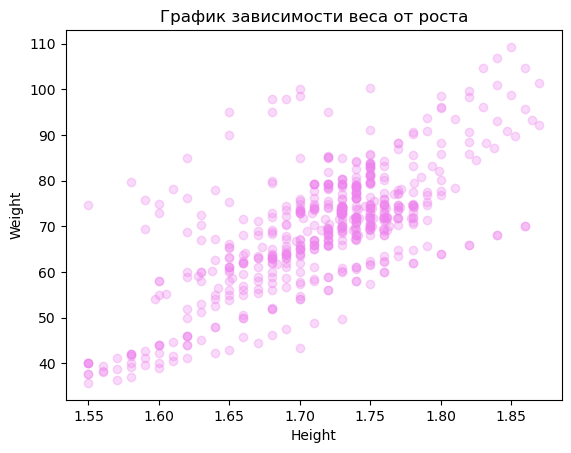

In [6]:
plt.scatter(data['Height'], data['Weight'], color='violet', alpha=0.3)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("График зависимости веса от роста")
plt.show()


В результате визуального анализа были выделены ярковыраженные группы. На следующем графике отображены выявленные кластеры данной зависимости.

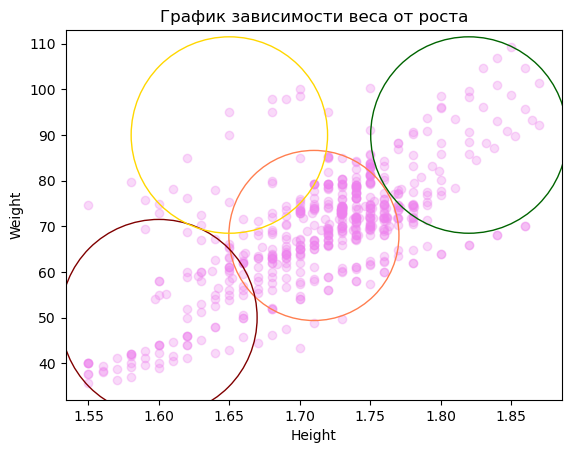

In [7]:
plt.scatter(data['Height'], data['Weight'], color='violet', alpha=0.3)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("График зависимости веса от роста")
plt.scatter( 1.71 , 68 , s = 15000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 1.82 , 90 , s = 20000, facecolors='none', edgecolors='darkgreen' ) 
plt.scatter( 1.60 , 50 , s = 20000, facecolors='none', edgecolors='maroon' ) 
plt.scatter( 1.65 , 90 , s = 20000, facecolors='none', edgecolors='gold' ) 
plt.show()

Далее также построены графики зависисмостей одной переменной от другой, после чего отображены кластеры, выделенный в следствие визуального анализа:

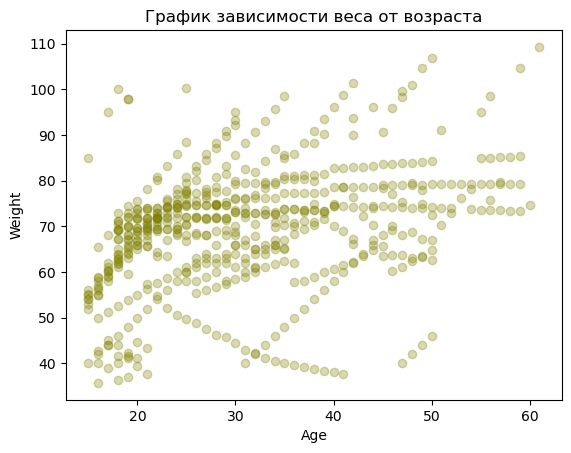

In [8]:
plt.scatter(data['Age'], data['Weight'], color='olive', alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("График зависимости веса от возраста")
plt.show()

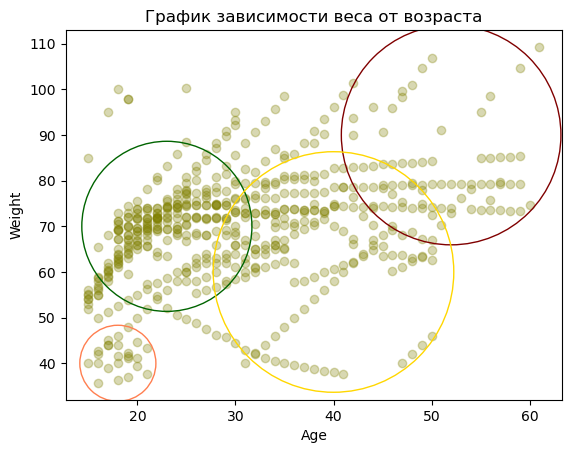

In [9]:
plt.scatter(data['Age'], data['Weight'], color='olive', alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("График зависимости веса от возраста")
plt.scatter( 18 , 40 , s = 3000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 23 , 70 , s = 15000, facecolors='none', edgecolors='darkgreen' ) 
plt.scatter( 52, 90 , s = 25000, facecolors='none', edgecolors='maroon' ) 
plt.scatter( 40, 60 , s = 30000, facecolors='none', edgecolors='gold' )
plt.show()

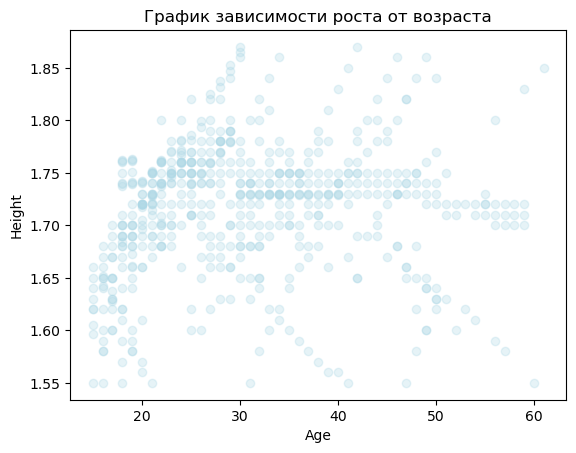

In [10]:
plt.scatter(data['Age'], data['Height'], color='lightblue', alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("График зависимости роста от возраста")
plt.show()

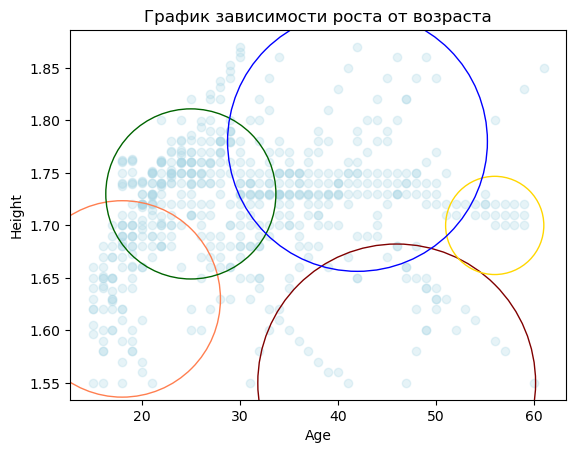

In [11]:
plt.scatter(data['Age'], data['Height'], color='lightblue', alpha=0.3)
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("График зависимости роста от возраста")
plt.scatter( 18 , 1.63 , s = 20000, facecolors='none', edgecolors='coral' ) 
plt.scatter( 25, 1.73 , s = 15000, facecolors='none', edgecolors='darkgreen' ) 
plt.scatter( 46, 1.55 , s = 40000, facecolors='none', edgecolors='maroon' ) 
plt.scatter( 56, 1.7 , s = 5000, facecolors='none', edgecolors='gold' )
plt.scatter( 42, 1.78 , s = 35000, facecolors='none', edgecolors='blue' ) 
plt.show()

### Реализация метода K-Means

#### 1. Зависимость веса от роста 

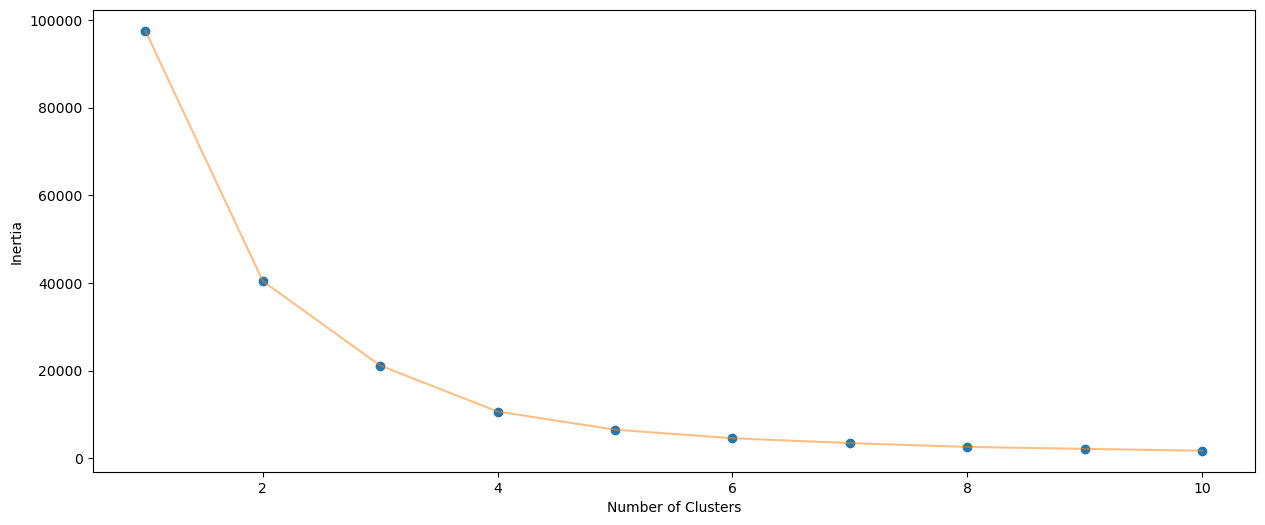

In [46]:
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['Height' , 'Weight']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Был использован подход, называемый «метод локтя», чтобы найти наилучшее значение N. Для этого был построен график зависимости инерции от количества кластеров, или N. Можно заметить, что до N=4 наблюдается быстрое уменьшение отклонения, но потом отклонение перестает падать также быстро. Значит это и есть подходящее значение, такое, что общее отклонение внутри каждого кластера становится достаточно мало.

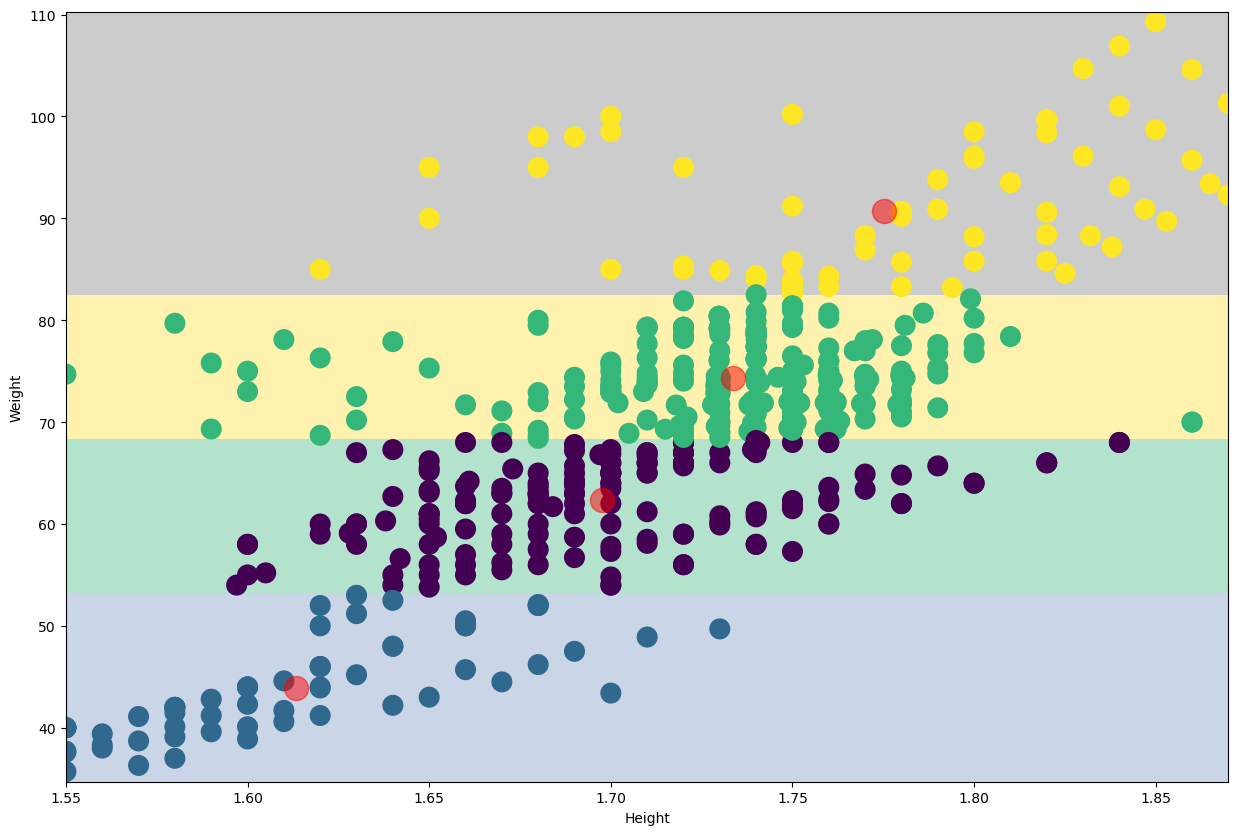

In [49]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min() , X1[:, 0].max()
y_min, y_max = X1[:, 1].min() -1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Height' ,y = 'Weight' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Weight')
plt.xlabel('Height')
plt.show()

Примечание: итоговые центры кластеров помечены красным

#### Вывод из зависимости 1:
Сравнивая результат работы алгоритма и визуальный анализ, можно сделать вывод, что в первой зависимости (зависимость веса от роста) при визуальном анализе удалось определить верное количество кластеров(4), но их расположение было установлено не совсем точно. 


#### 2. Зависимость веса от возраста

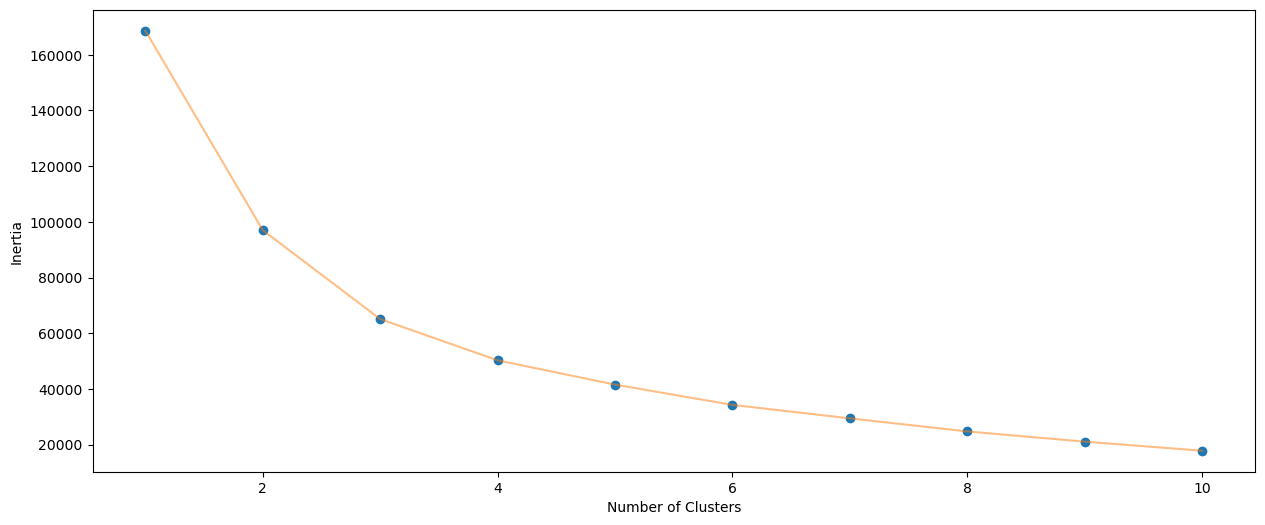

In [51]:
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['Age' , 'Weight']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Берем N=4

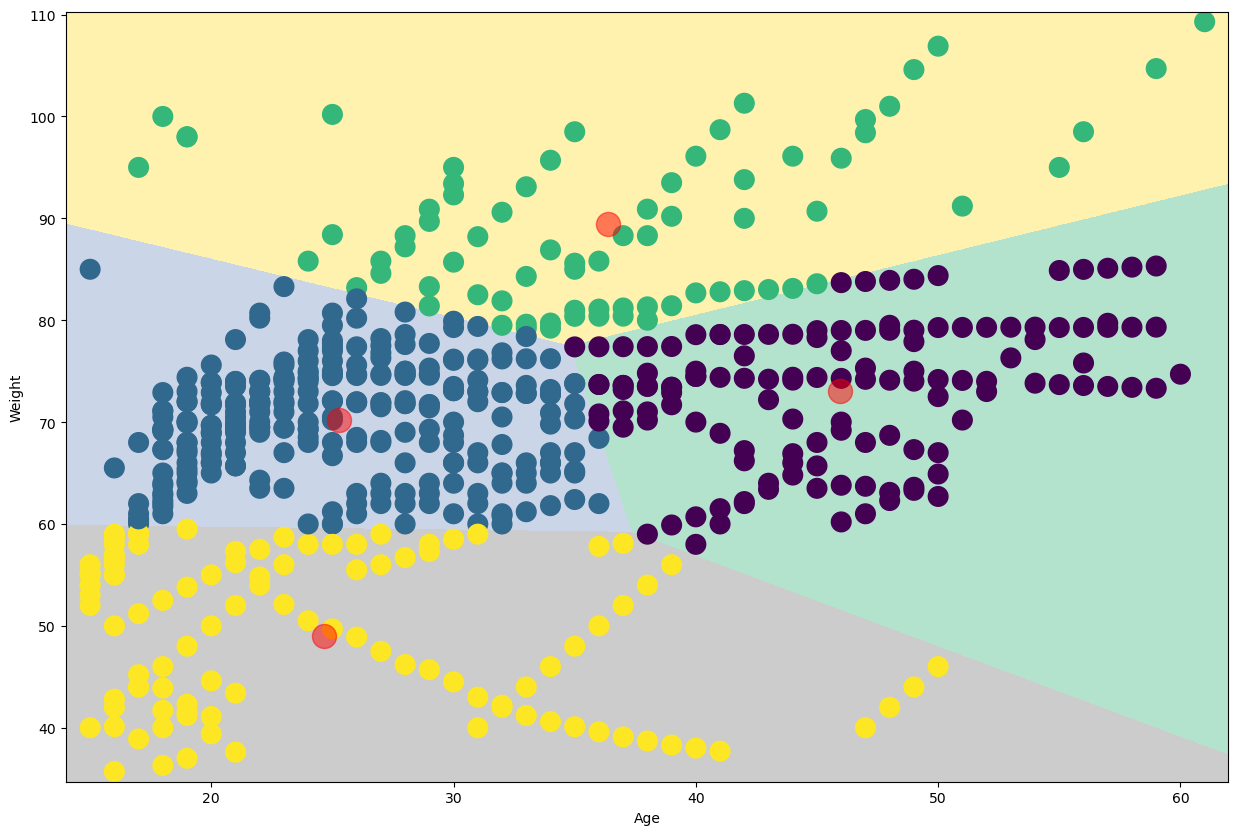

In [52]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min()-1, X1[:, 0].max()+1
y_min, y_max = X1[:, 1].min() -1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Weight' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Weight')
plt.xlabel('Age')
plt.show()

#### Вывод из зависимости 2:
Во второй зависимости (зависимость веса от возраста) при визуальном анализе удалось определить верное количество кластеров(4), конкретные области, занимаемые ими, также были определены достаточно точно. 

#### 3. Зависимость роста от возраста

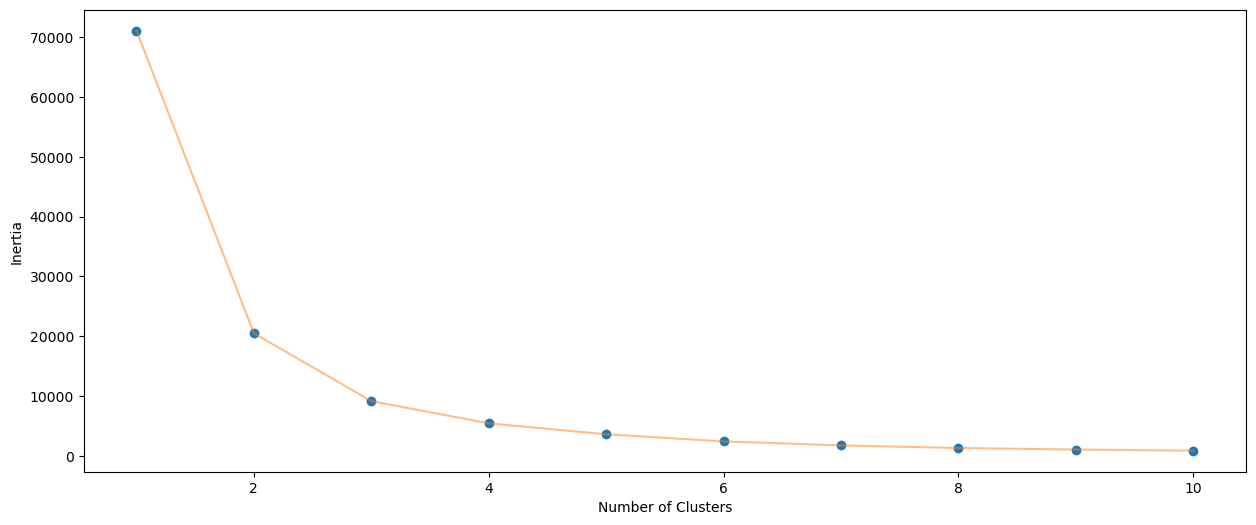

In [53]:
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
X1 = data[['Age' , 'Height']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Снова берем N=4

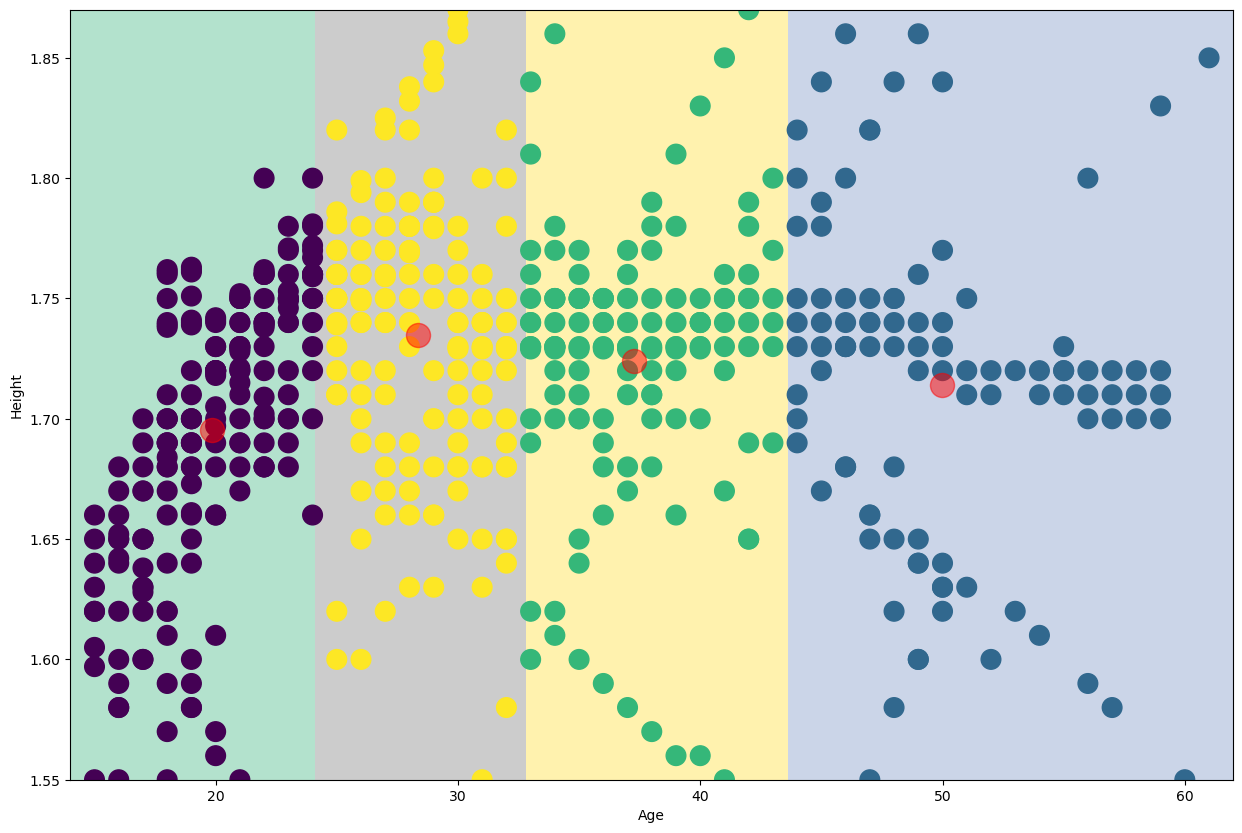

In [54]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_


h = 0.02
x_min, x_max = X1[:, 0].min()-1, X1[:, 0].max()+1
y_min, y_max = X1[:, 1].min(), X1[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 


plt.figure(1 , figsize = (15 , 10) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Height' , data = data , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Height')
plt.xlabel('Age')
plt.show()

#### Вывод из зависимости 3:
В зависимости роста от возраста при первичном анализе было неверно определено количество групп. В следствие визуального исследование был сделан вывод, что их следует выделить 5, но в результате использования "метода локтя" наилучшее N было равно 4. Однако расположение кластеров было определено достаточно точно и до использования алгоритма.  

### Общий вывод
В ходе выполнения данной лабораторной работы были изучен и опробован на выбранном датасете, представленном в виде графиков зависимостей, метод кластеризации KMeans, изучено, как определить наилучшее количество групп.
В результате выполнения работы, можно сделать вывод, что визуальный анализ данных в виде зависимостей не всегда точен, уступает алгомитритму. 